# Introduction

## About the dataset:
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

## Features:
There are 25 features:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Overview:


This notebook consisits of the following parts:

1) Exploratory Data Analysis

2) Data cleaning and further exploration

3) Building a base model

4) Feature Engineering

5) Building ML model using various algorithms and comparing them

6) Conclusion

7) Deployment


In [ ]:
#Import basic libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os


%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('paper')

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff 

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(10)

In [ ]:
# Load the data
df = pd.read_csv("../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Let's see if the data has any missing values

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### Well it looks like there are no missing values which skips one of the main parts of pre-processing i.e. missing value imputation

#### Now let's check dtypes of each feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Statistical description of the features:

##### 1) Numerical features:

In [ ]:
df[['AGE','LIMIT_BAL', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,35.485500,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,9.217904,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,21.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,28.000000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,34.000000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,41.000000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,79.000000,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


##### 2) Categorical features:

In [ ]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


#### Let's rename the target column to "default" and payment status "PAY_0" to "PAY_1" to make it continous

In [ ]:
df = df.rename(columns={'default.payment.next.month': 'default', 
                        'PAY_0': 'PAY_1'})

# 1) Exploratory Data Anaysis:

#### A) Categorical features:

##### 1) Marriage:

In [ ]:
marriage_count = df['MARRIAGE'].value_counts().reset_index().rename(columns={'index':'index','MARRIAGE':'count'})

In [ ]:
fig = go.Figure(go.Bar(
    x = marriage_count['index'],y = marriage_count['count'],text=marriage_count['count'],marker={'color': marriage_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of marriage',xaxis_title="Marriage status",yaxis_title="Number of count")
fig.show()

##### Marriage has label 0, which is undocumented

##### 2) Education:

In [ ]:
edu_count = df['EDUCATION'].value_counts().reset_index().rename(columns={'index':'index','EDUCATION':'count'})

In [ ]:
edu_count['index'][0] = 'University'
edu_count['index'][1] = 'Graduate School'
edu_count['index'][2] = 'High school'
edu_count['index'][3] = 'Unknown 1'
edu_count['index'][4] = 'Others'
edu_count['index'][5] = 'Unknown 2'
edu_count['index'][6] = 'Unknown 3'

In [ ]:
fig = go.Figure(go.Bar(
    x = edu_count['index'],y = edu_count['count'],text = edu_count['count'],marker={'color': edu_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of education',xaxis_title="Education status",yaxis_title="Number of count")
fig.show()

##### Education is has label 0 ,label 5 & label 6, which is undocumented. Also most of the customers are well educated!

##### 3) Sex

In [ ]:
sex_count = df['SEX'].value_counts().reset_index().rename(columns={'index':'index','SEX':'count'})

In [ ]:
sex_count['index'][1] = 'Male'
sex_count['index'][0] = 'Female'

In [ ]:
fig = go.Figure(go.Bar(
    x = sex_count['index'],y = sex_count['count'],text=sex_count['count'],marker={'color': sex_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of gender',xaxis_title="Gender",yaxis_title="Number of count")
fig.show()

##### It seems that there are more number of female customers

#### B) Numerical variables:

##### 1) Bill amount:

In [ ]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [ ]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=bills.columns.to_list())  

fig.add_trace(go.Histogram(x= df["BILL_AMT1"],name='BILL_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT2"],name='BILL_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT3"],name='BILL_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT4"],name='BILL_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT5"],name='BILL_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT6"],name='BILL_AMT6'),row = 3, col = 2)


fig.update_layout(height=600, width=800, title_text="Histogram Subplots of Bill Amount")
fig.show()

#### All the bill amounts are highly right skewed, so transformation might be required!

##### 2) Previous payment

In [ ]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [ ]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_AMT1"],name='PAY_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT2"],name='PAY_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_AMT3"],name='PAY_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT4"],name='PAY_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_AMT5"],name='PAY_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_AMT6"],name='PAY_AMT6'),row = 3, col = 2)


fig.update_layout(height=600, width=800, title_text="Histogram Subplots of Amount of Previous Payment")
fig.show()

#### Also all the prevoius bill amounts are highly right skewed, so transformation might be required!

##### 3) Previous payment status:

In [ ]:
pay_s = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
df['PAY_1'].value_counts().index.to_list().sort()

In [ ]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_1"],name='PAY_1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_2"],name='PAY_2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_3"],name='PAY_3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_4"],name='PAY_4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_5"],name='PAY_5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_6"],name='PAY_6'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Histogram Subplots of Previous Payment Status")
fig.show()

##### There are a lot of customers who pay he previous amount duly but there are only some of them who pay late

##### 4) Age:

In [ ]:
fig =  go.Figure(data=[go.Histogram(x= df["AGE"])])
fig.show()

##### Looking at the distribution, it's clear that there are more people who are aged between 20-30 and it goes on decreasing after 30. It is also a bit right skewed

##### 5) Amount given in credit:

In [ ]:
fig =  go.Figure(data=[go.Histogram(x= df["LIMIT_BAL"])])
fig.show()

##### More of the people have taken credit between 10k to 400k. Probabaly we can group people as per their taken credit. We will see that in feature engineering!

#### C) Target column (Default):

In [ ]:
target_count = df['default'].value_counts().reset_index().rename(columns={'index':'index','default':'count'})
fig = go.Figure(go.Bar(
    x = target_count['index'],y = target_count['count'],text=target_count['count'],marker={'color': target_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of defaulter',xaxis_title="Status of Defaulting",yaxis_title="Number of count")
fig.show()

#####  The data has not a large unbalance with respect of the target value (default).

#### Correlation:

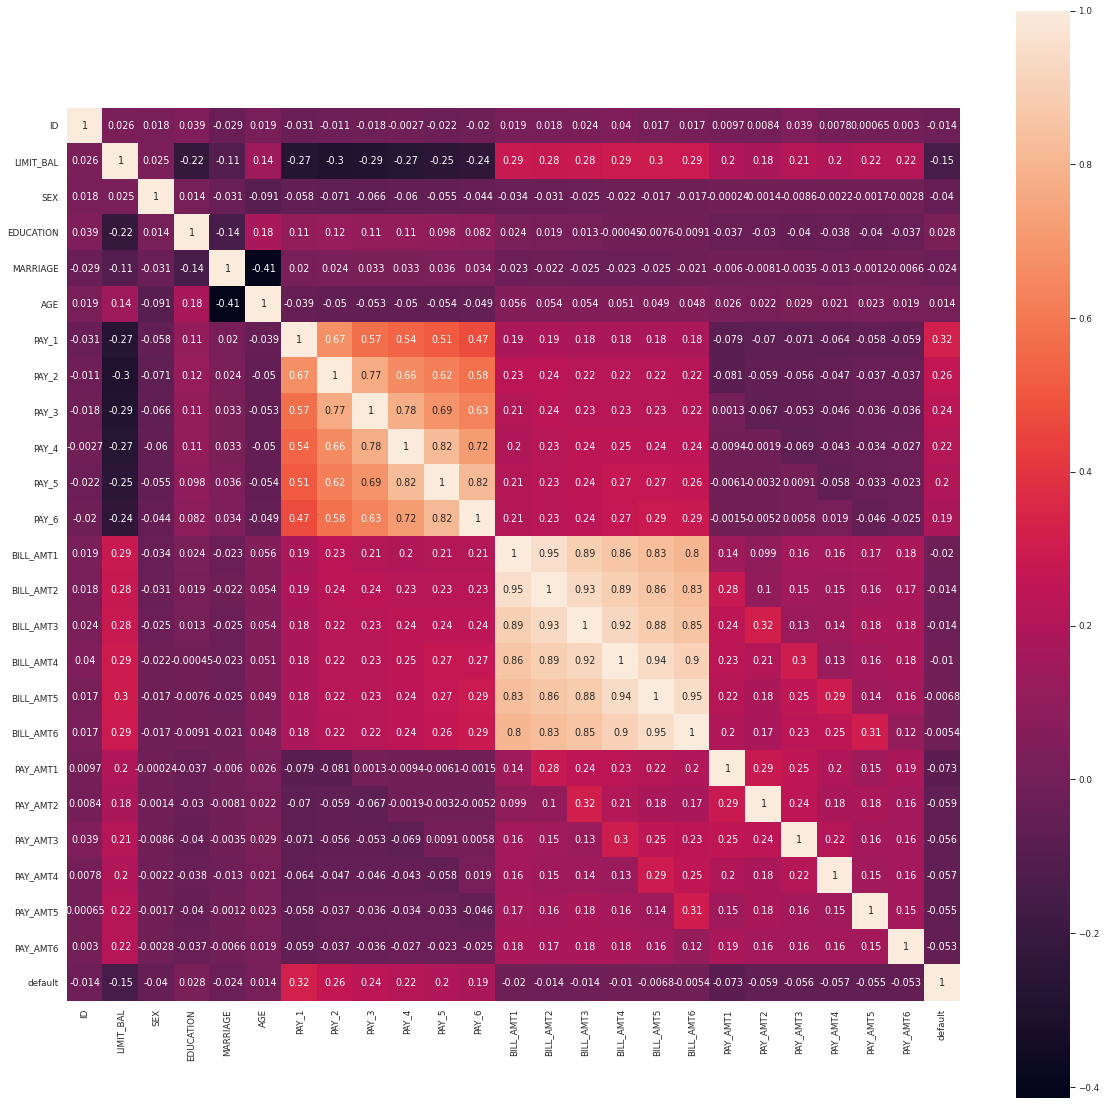

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True)

##### It's an interesting correlation plot. The heatmat shows that features are correlated with each other (collinearity), such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive.

# 2) Data cleaning and further exploration:

#### I have pointed out earlier that there are some undocumented labels. Now I will try to clean them up!

##### The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

In [ ]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

##### The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3)

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

##### "-1" is paid duly, but there are "-2" and "0" labels in payment status variable. So let's combine them and put everything as "0"

In [ ]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

##### Histogram after clubbing "-2" and "-1" to "0" label

In [ ]:
fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_1"],name='PAY_1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_2"],name='PAY_2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_3"],name='PAY_3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_4"],name='PAY_4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_5"],name='PAY_5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_6"],name='PAY_6'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Histogram Subplots of Previous Payment Status (After clubbing)")
fig.show()

### For further exploration, let's do bivariate analysis of all the features with the target variable:

##### To do that let's define a function which gives out a cross tab and visualization:

In [ ]:
def cross(Col1, Col2):
    res = pd.crosstab(df[Col1], df[Col2])
    #Calculating the percentage of defaulters
    res['Percentage'] = round((res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]])) * 100,2)
    print(res)
    #Plotting a stack bar graph
    fig = go.Figure(data=[
    go.Bar(name='Non-Defaulters', x=res.index.to_list(),y=res[0]),
    go.Bar(name='Defaulters', x=res.index.to_list(), y=res[1],text=(res['Percentage']),textposition = "outside")])
    # Change the bar mode to stack
    fig.update_layout(barmode='stack',title_text = res.index.name + " variable v/s target" ,xaxis_title=res.index.name,yaxis_title="Number of count")
    fig.show()

#### Gender v/s Defaulters:

In [ ]:
cross("SEX","default")

#### Education v/s Defaulters:

In [ ]:
cross("EDUCATION","default")

#### Marriage v/s Defaulters:

In [ ]:
cross("MARRIAGE","default")

##### There's not much interesting insights available from the cross tab analysis apart from there is quite less defaulters who has lower than high school level eductation and married people tend to default more!

#### Age distribution of Defaulters:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = df[df['default'] == 0]["AGE"],marker_color="green",name="Non-defaulters"))
fig.add_trace(go.Histogram(x = df[df['default'] == 1]["AGE"],marker_color="orange",name="Defaulters"))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_layout(title="Distribution of age of defaulters and non-defaulters",xaxis_title="Percentage",yaxis_title="Counts")
fig.show()

##### The distribution is almost uniformly distributed but a bit right skewed for the defaulters. But it shows that old age people are almost non-defaulters

# 3) Baseline model:

#### A baseline model that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset. You can use these predictions to measure the baseline's performance (e.g., accuracy)-- this metric will then become what you compare any other machine learning algorithm against. So let's build a logistic regression without any hyperparameter tuning or feature engineering

In [ ]:
X = df.drop(['default','ID'], axis=1)  
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Accuracy: 0.7788888888888889

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       1.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.89      0.50      0.44      9000
weighted avg       0.83      0.78      0.68      9000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


#### So our baseline model has an accuracy of 0.77. We have to better this with other models

# 4) Feature Engineering

#### To begin with, let's one hot encode all the categorical features. So I will convert them into datatype "object"

In [ ]:
df[['SEX','MARRIAGE','EDUCATION']] = df[['SEX','MARRIAGE','EDUCATION']].astype('object')

#One Hot encoding
df = pd.get_dummies(df)
df.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,1,0,0,1,0,0


#### Our final dataset is finished, let's split the dataset in 70:30 ratio for train and test

In [ ]:
X = df.drop(['default','ID'], axis=1)  
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

#### We have observed that there is imbalance in the samples. Let's see the distribution of the samples in the train dataset

In [ ]:
# Separate majority and minority classes
df_majority = df_train[df_train.default == 0]
df_minority = df_train[df_train.default == 1]

print(df_majority.default.count())
print("-----------")
print(df_minority.default.count())
print("-----------")
print(df_train.default.value_counts())

16355
-----------
4645
-----------
0    16355
1     4645
Name: default, dtype: int64


#### There's a lot of imbalance in the sample. So there are many ways to resampling!

#### Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution. This is a simple and effective strategy for imbalanced classification problems.

#### The simplest strategy is to choose examples for the transformed dataset randomly, called random resampling. There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

#### A) Random Oversampling: Randomly duplicate examples in the minority class.
#### B) Random Undersampling: Randomly delete examples in the majority class.
#### C) SMOTE: Synthetic Minority Oversampling Technique

#### Let's look at them, one by one


### A) Random Oversampling:

#### Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

#### Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = 16355,    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default.value_counts()

1    16355
0    16355
Name: default, dtype: int64

### B) Random Undersampling:

#### Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

#### This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.

#### This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4645,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default.value_counts()

1    4645
0    4645
Name: default, dtype: int64

### C) SMOTE: Synthetic Minority Oversampling Technique

#### The upsample has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling. The downsample can discard potentially useful information and the sample can be biased, but it helps improving the run time

#### SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. To create a syntetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model

In [ ]:
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

32710
16355


#### So we have 4 sets of training data:

#### 1) The normal train data with unbalance
#### 2) Train data with oversampling
#### 3) Train data with undersampling
#### 4) Train data with SMOTE algorithm

#### The evaluation will be based on K fold cross validation of AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve score which is considered as the best metric for binary classification and also the test score

#### AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

#### First let's define a function which evaluates the model with train and test score and also performs a K-fold cross validation on the train dataset

In [ ]:
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]


    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))
    
    
    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
        algo.fit(xtrain_k,ytrain_k)
        y_pred_k = algo.predict(xtest_k)
        roc = roc_auc_score(ytest_k,y_pred_k)
        score.append(roc)
    print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))
    
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()

# 5) Model Building:

#### I will be using the following algorithms with the 4 different datasets and also with hyperparameter tuning the models

### i) Logistic Regression
### ii) Naive Bayes
### iii) K-Nearest Neighbours
### iv) Decision Tree
### v) Random Forest
### vi) AdaBoost Classifier
### vii) GradientBoosting Classifier
### viii) XGBoost Classifier

### i) Logistic Regression:

#### Let's first find out the best parameters for all the datasets:

In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_log
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {'C': np.logspace(-5, 8, 15)}
    # Instantiate a logistic regression classifier
    logreg = LogisticRegression()
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'roc_auc', cv=5, random_state=0)
    # Fit it to the data
    logreg_cv.fit(i,j)
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling
Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Logistic Regression Parameters: {'C': 2275.845926074791}
____________________________________________________________________________________________________


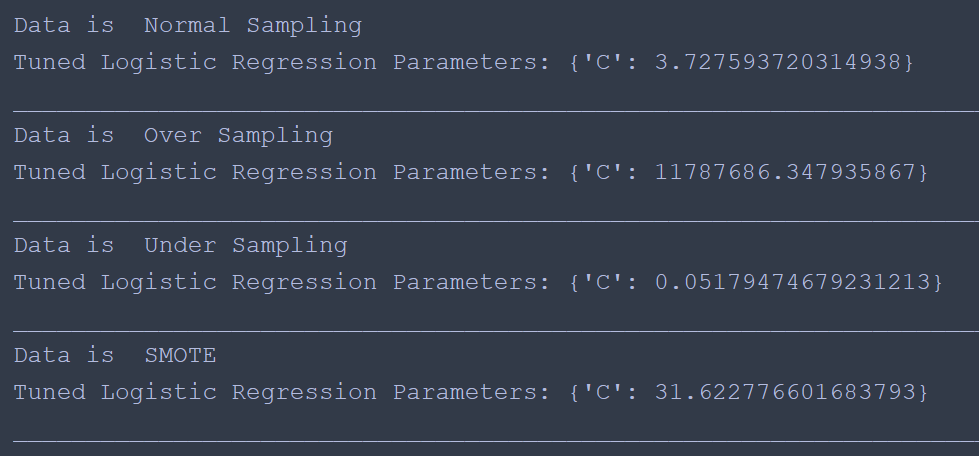

In [ ]:
Image(filename=data_dir/'cc1.PNG')

In [ ]:
param_log =[{'C': 3.727593720314938},{'C': 11787686.347935867},{'C': 0.05179474679231213},{'C': 31.622776601683793}]

Data is  Normal Sampling  And with hyper parameter  {'C': 3.727593720314938}
Overall Train Accuracy 0.7781904761904762
Train AUC Score 0.6566949665965613
Overall Test Accuracy 0.7787777777777778
Test AUC Score 0.6437886525890978
Classification Report of Test
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.50      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.64      0.50      0.44      9000
weighted avg       0.72      0.78      0.68      9000

K-Fold scores: 0.500 (+/- 0.00000)


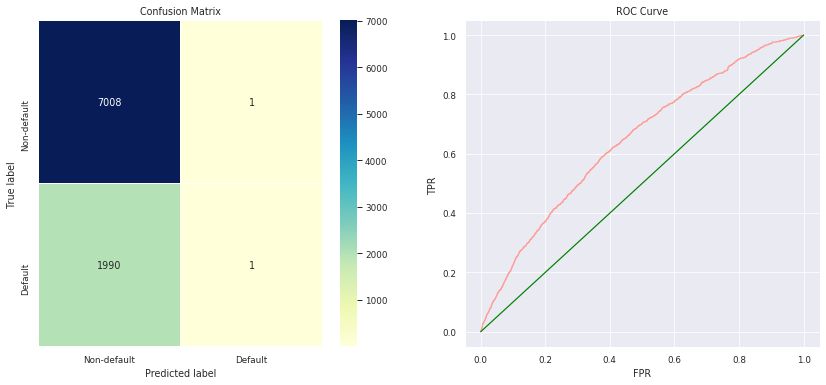

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'C': 11787686.347935867}
Overall Train Accuracy 0.6112809538367472
Train AUC Score 0.6526367143853591
Overall Test Accuracy 0.5542222222222222
Test AUC Score 0.646860257662549
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.51      0.64      7009
           1       0.29      0.71      0.41      1991

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.53      9000
weighted avg       0.74      0.55      0.59      9000

K-Fold scores: 0.613 (+/- 0.00001)


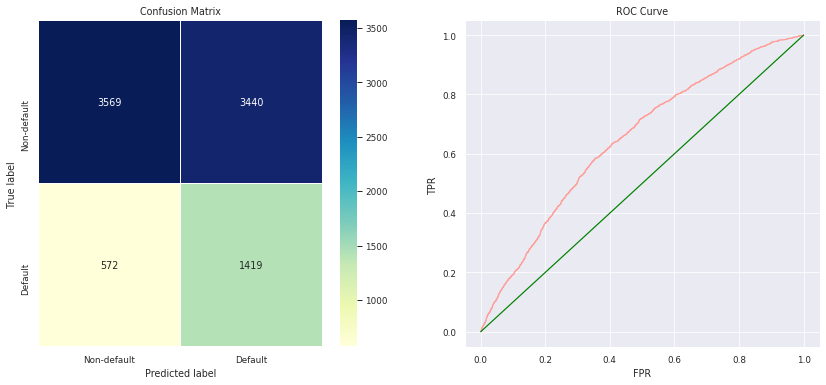

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'C': 0.05179474679231213}
Overall Train Accuracy 0.6203444564047362
Train AUC Score 0.6614241733590871
Overall Test Accuracy 0.5521111111111111
Test AUC Score 0.6491332196195478
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.51      0.64      7009
           1       0.29      0.71      0.41      1991

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.53      9000
weighted avg       0.73      0.55      0.59      9000

K-Fold scores: 0.615 (+/- 0.00009)


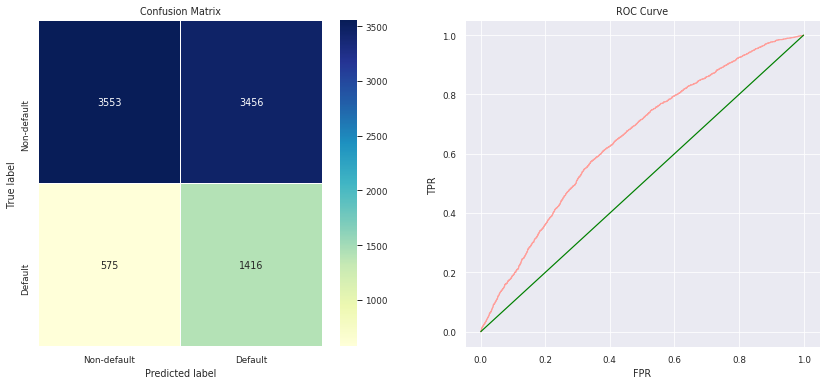

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'C': 31.622776601683793}
Overall Train Accuracy 0.6180984408437786
Train AUC Score 0.6571368784593513
Overall Test Accuracy 0.6541111111111111
Test AUC Score 0.6421998221559007
Classification Report of Test
               precision    recall  f1-score   support

           0       0.83      0.70      0.76      7009
           1       0.32      0.50      0.39      1991

    accuracy                           0.65      9000
   macro avg       0.58      0.60      0.57      9000
weighted avg       0.72      0.65      0.68      9000

K-Fold scores: 0.601 (+/- 0.00027)


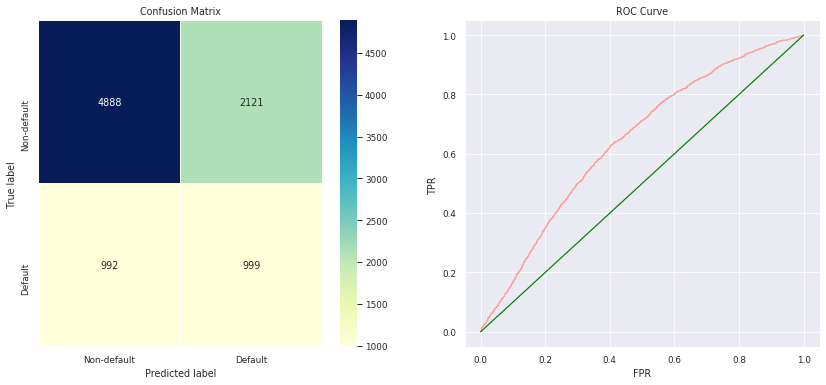

____________________________________________________________


In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(LogisticRegression(**param_log[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

#### The best AUC score for Logistic Regression is seen in Under sampling data with an Test AUC score of 0.65 and K-fold score of 0.615

### ii) Naive bayes:

Data is  Normal Sampling
Overall Train Accuracy 0.765095238095238
Train AUC Score 0.7472296421006075
Overall Test Accuracy 0.7558888888888889
Test AUC Score 0.7358834902588829
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      7009
           1       0.46      0.54      0.50      1991

    accuracy                           0.76      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.77      0.76      0.76      9000

K-Fold scores: 0.698 (+/- 0.00003)


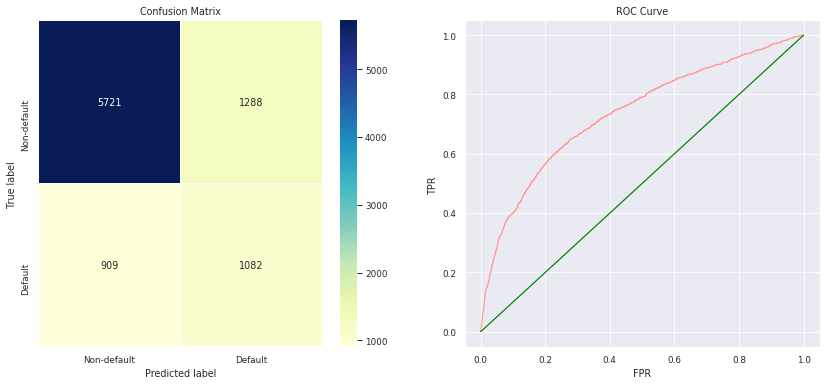

____________________________________________________________
Data is  Over Sampling
Overall Train Accuracy 0.6991745643534087
Train AUC Score 0.7461003448684843
Overall Test Accuracy 0.7514444444444445
Test AUC Score 0.7367858244107329
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.81      0.83      7009
           1       0.45      0.56      0.50      1991

    accuracy                           0.75      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.77      0.75      0.76      9000

K-Fold scores: 0.700 (+/- 0.00001)


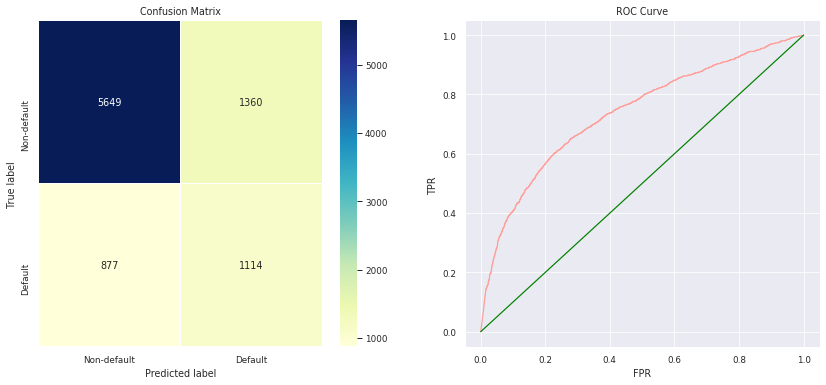

____________________________________________________________
Data is  Under Sampling
Overall Train Accuracy 0.7036598493003229
Train AUC Score 0.7496985890589207
Overall Test Accuracy 0.7393333333333333
Test AUC Score 0.7404739862696446
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      7009
           1       0.43      0.59      0.50      1991

    accuracy                           0.74      9000
   macro avg       0.65      0.69      0.66      9000
weighted avg       0.77      0.74      0.75      9000

K-Fold scores: 0.703 (+/- 0.00014)


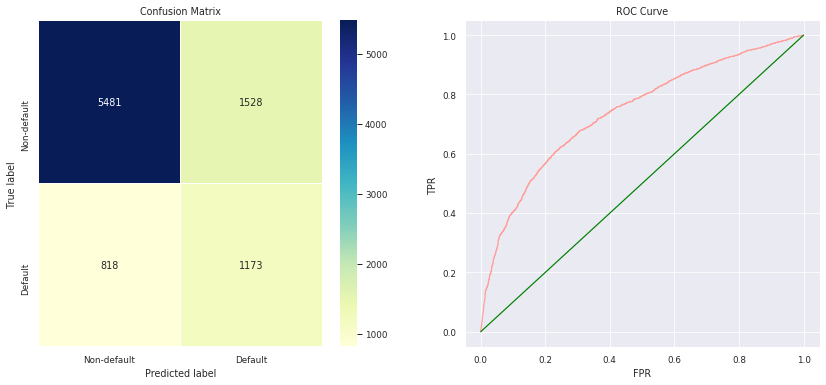

____________________________________________________________
Data is  SMOTE
Overall Train Accuracy 0.6585142158361358
Train AUC Score 0.7861234208403972
Overall Test Accuracy 0.5083333333333333
Test AUC Score 0.7220484045804924
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.43      0.57      7009
           1       0.28      0.80      0.42      1991

    accuracy                           0.51      9000
   macro avg       0.58      0.61      0.50      9000
weighted avg       0.75      0.51      0.54      9000

K-Fold scores: 0.661 (+/- 0.00031)


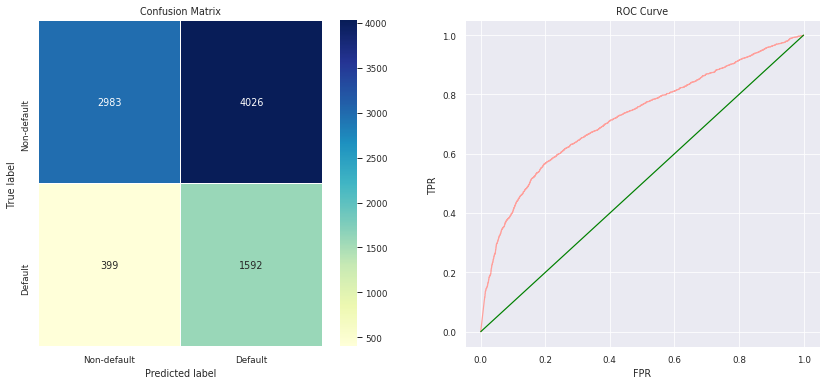

____________________________________________________________


In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    ss = StandardScaler()
    a = ss.fit_transform(i)
    xts = pd.DataFrame(a,columns = i.columns)
    b = ss.transform(X_test)
    model_eval(GaussianNB(), xts,j,b,y_test)
    print("_" * 60)

#### The best score for Naive Bayes is registered when trained with the under sampling data with an Test AUC score of 0.74 and train K-Fold score of 0.70 after it was standardized

### iii) K-Nearest Neighbours: 

#### Let's first find out the best parameters for all the datasets:

#### It's always recommended to scale the data before using distance based algorithm to make the model not biased

In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_xgb
    ss = StandardScaler()
    a = ss.fit_transform(i)
    xts = pd.DataFrame(a,columns = i.columns)
    best_knn = []
    print('Data is ',k) # Instantiate a KNN classifier: tree
    knn = KNeighborsClassifier()
    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_neighbors' : sp_randint(1,20),
             'p': sp_randint(1,5)}
    rsearch_knn = RandomizedSearchCV(knn, param_distributions = params, cv = 3, random_state = 3 , n_iter = 50,n_jobs = -1)
    rsearch_knn.fit(xts,j)
    best_knn.append(rsearch_knn.best_params_)
    print("Tuned KNN Parameters: {}".format(rsearch_knn.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling


KeyboardInterrupt: 

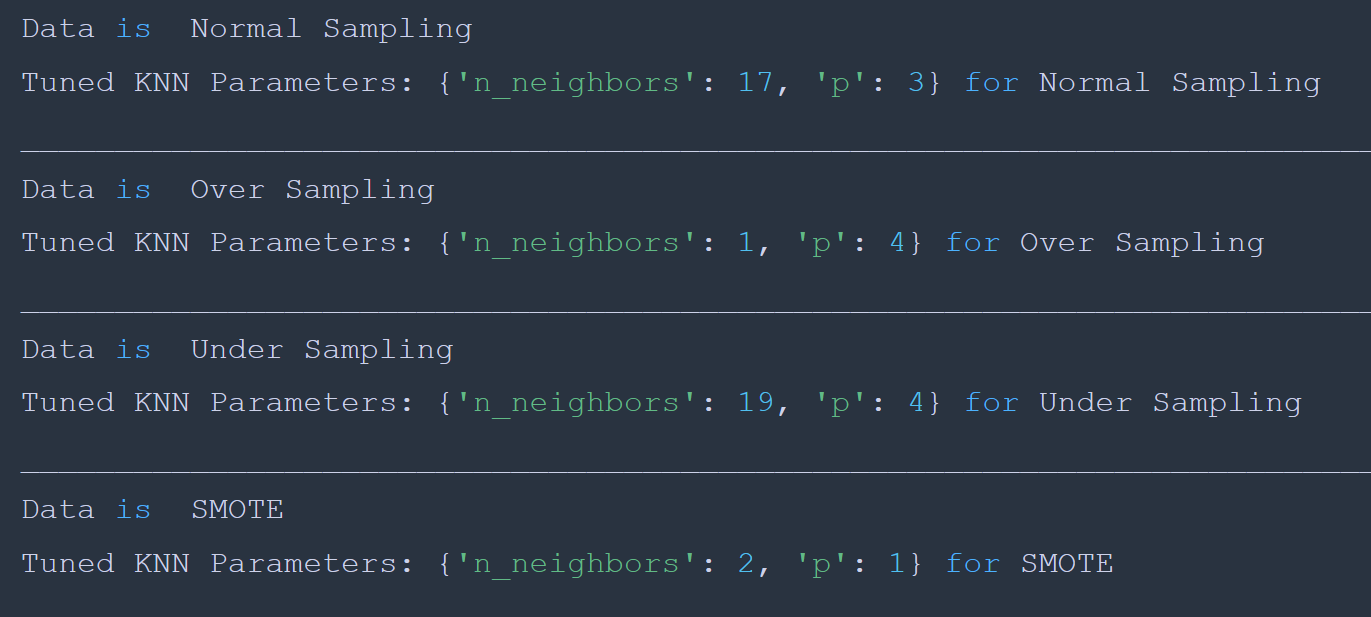

In [ ]:
Image(filename=data_dir/'CC2.PNG')

In [ ]:
param_knn = [{'n_neighbors': 17, 'p': 3},{'n_neighbors': 1, 'p': 4},{'n_neighbors': 19, 'p': 4},{'n_neighbors': 2, 'p': 1}]

Data is  Normal Sampling  And with hyper parameter  {'n_neighbors': 17, 'p': 3}
Overall Train Accuracy 0.8221428571428572
Train AUC Score 0.817443245746043
Overall Test Accuracy 0.8102222222222222
Test AUC Score 0.7381605726267562
Classification Report of Test
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.64      0.33      0.43      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000

K-Fold scores: 0.636 (+/- 0.00001)


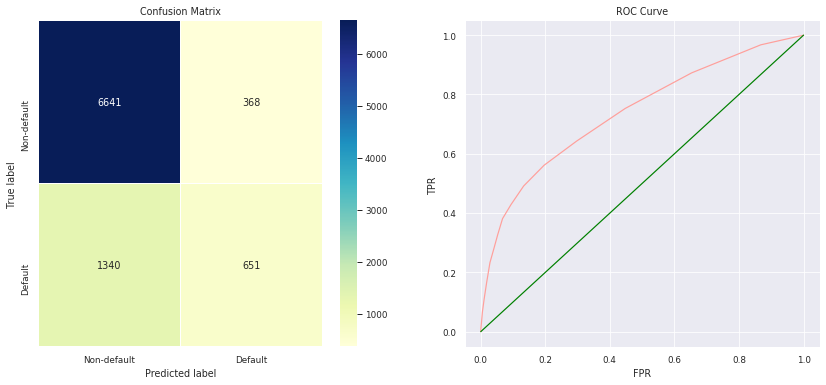

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'n_neighbors': 1, 'p': 4}
Overall Train Accuracy 0.9990217059003363
Train AUC Score 0.9990217059003362
Overall Test Accuracy 0.7304444444444445
Test AUC Score 0.6041729801513
Classification Report of Test
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      7009
           1       0.39      0.38      0.38      1991

    accuracy                           0.73      9000
   macro avg       0.61      0.60      0.61      9000
weighted avg       0.73      0.73      0.73      9000

K-Fold scores: 0.886 (+/- 0.00001)


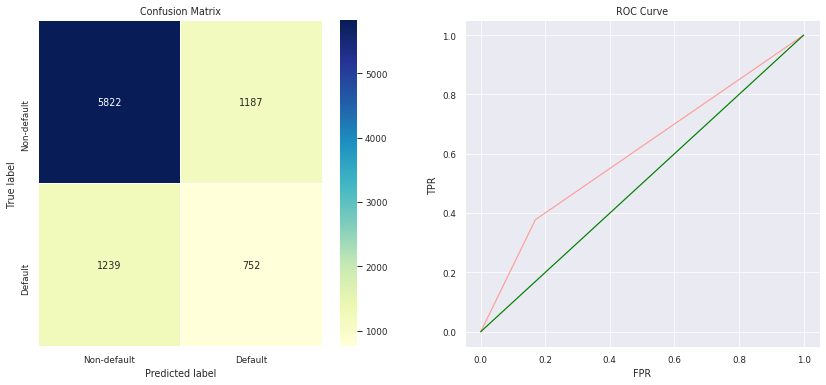

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'n_neighbors': 19, 'p': 4}
Overall Train Accuracy 0.7163616792249731
Train AUC Score 0.791238863507064
Overall Test Accuracy 0.7356666666666667
Test AUC Score 0.7398985619336091
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      7009
           1       0.43      0.57      0.49      1991

    accuracy                           0.74      9000
   macro avg       0.65      0.68      0.65      9000
weighted avg       0.77      0.74      0.75      9000

K-Fold scores: 0.684 (+/- 0.00011)


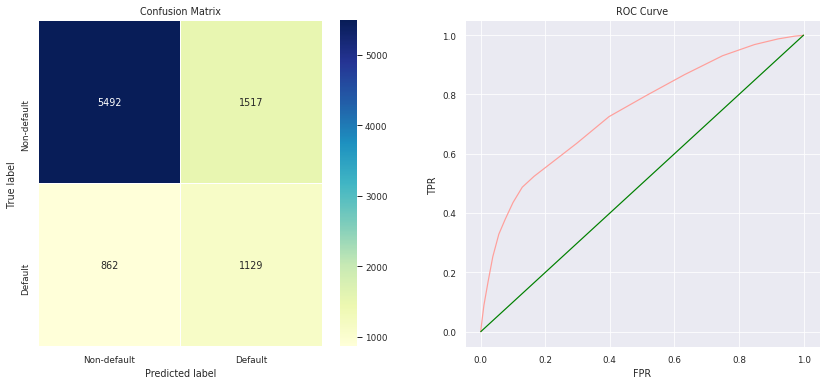

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'n_neighbors': 2, 'p': 1}
Overall Train Accuracy 0.9316111280953837
Train AUC Score 0.986849098004279
Overall Test Accuracy 0.771
Test AUC Score 0.646370681191342
Classification Report of Test
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      7009
           1       0.47      0.24      0.32      1991

    accuracy                           0.77      9000
   macro avg       0.64      0.58      0.59      9000
weighted avg       0.73      0.77      0.74      9000

K-Fold scores: 0.847 (+/- 0.00003)


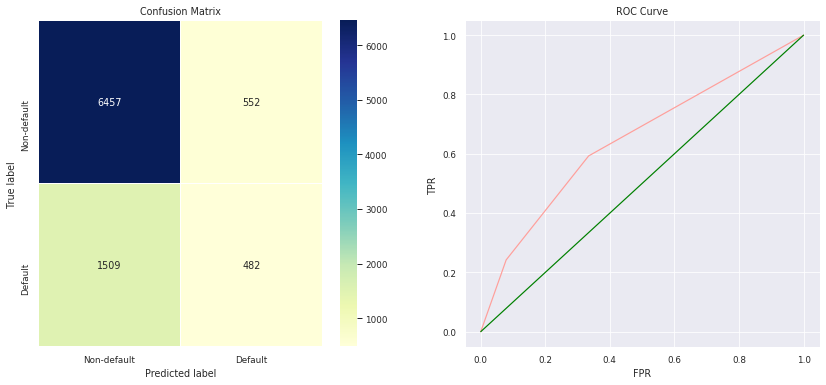

____________________________________________________________


In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_knn[l])
    ss = StandardScaler()
    a = ss.fit_transform(i)
    xts = pd.DataFrame(a,columns = i.columns)
    b = ss.transform(X_test)
    model_eval(KNeighborsClassifier(**param_knn[l]), xts,j,b,y_test)
    print("_" * 60)

#### The best score for KNN is registered when trained with the under sampling data with an Test AUC score of 0.74 and train K-Fold score of 0.68

### iv) Decision Tree

#### Let's first find out the best parameters for all the datasets:

In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(i,j)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",name)
    print("_" * 100)    

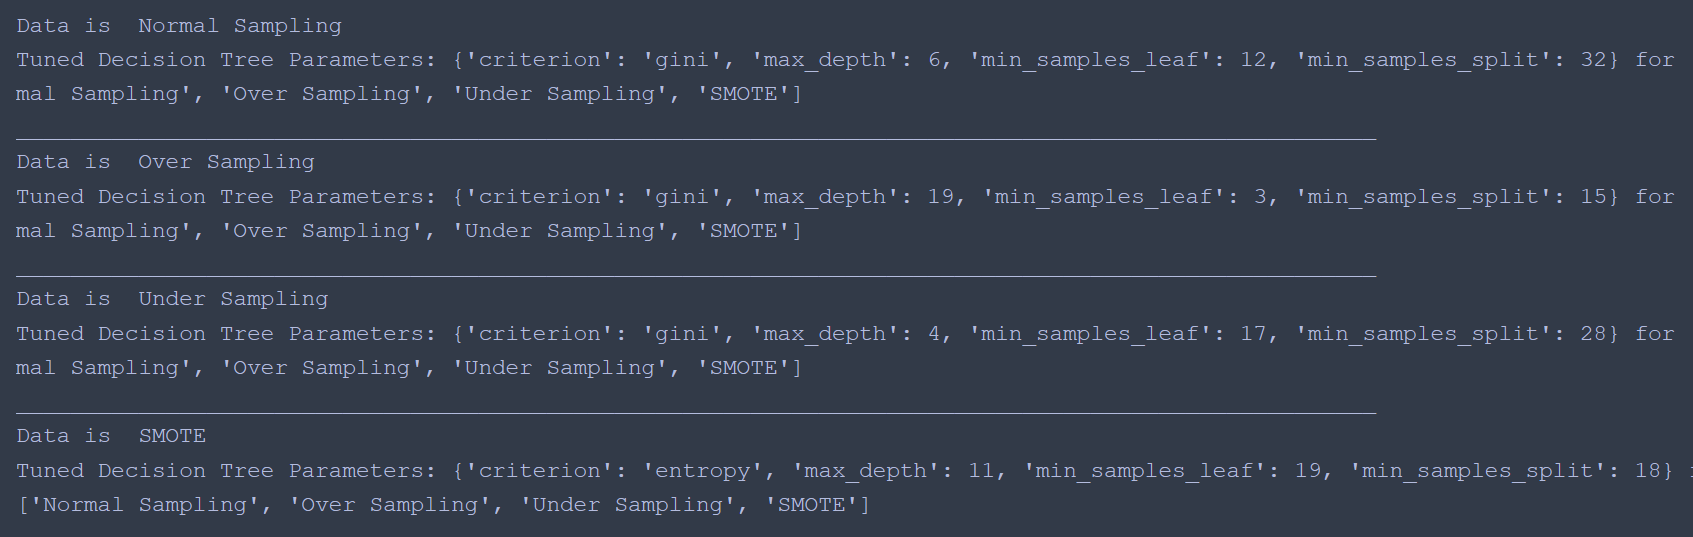

In [ ]:
Image(filename=data_dir/'cc3.PNG')

In [ ]:
param_dt = [{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32},
           {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15},
           {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28},
           {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.8266666666666667
Train AUC Score 0.7763312654935781
Overall Test Accuracy 0.8176666666666667
Test AUC Score 0.7439976899901749
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

K-Fold scores: 0.658 (+/- 0.00003)


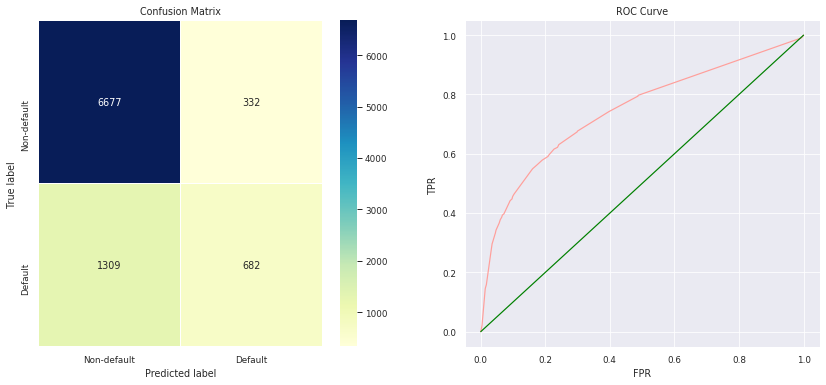

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.9077346377254663
Train AUC Score 0.9752067458477505
Overall Test Accuracy 0.7234444444444444
Test AUC Score 0.6671962051517462
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      7009
           1       0.40      0.51      0.45      1991

    accuracy                           0.72      9000
   macro avg       0.62      0.65      0.63      9000
weighted avg       0.75      0.72      0.73      9000

K-Fold scores: 0.804 (+/- 0.00006)


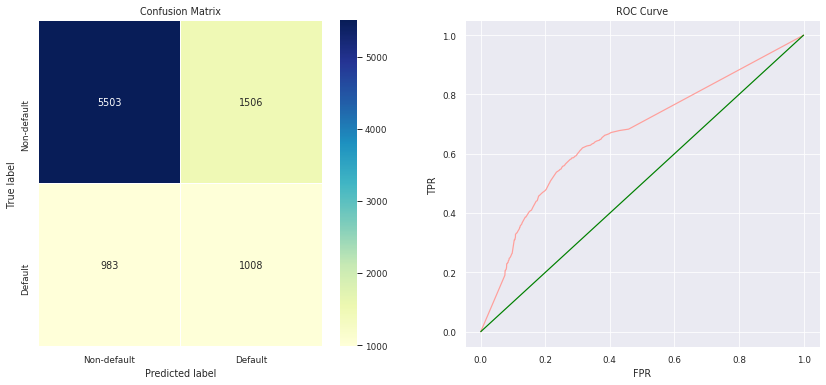

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.709903121636168
Train AUC Score 0.7635696334241364
Overall Test Accuracy 0.7834444444444445
Test AUC Score 0.7479756063077112
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      7009
           1       0.51      0.54      0.52      1991

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000

K-Fold scores: 0.699 (+/- 0.00010)


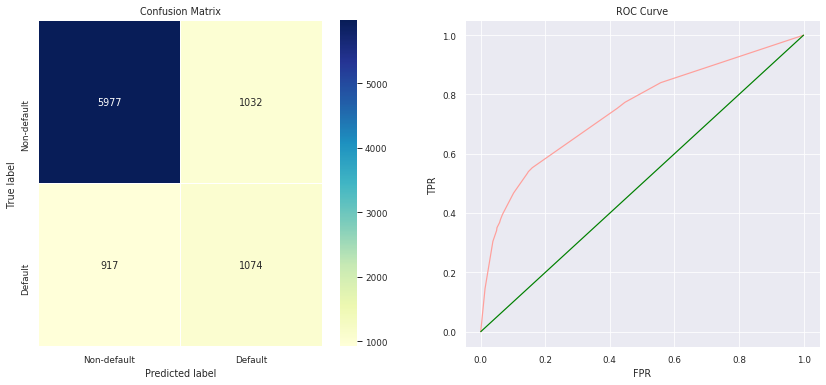

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.8583002140018343
Train AUC Score 0.9290450688031272
Overall Test Accuracy 0.7887777777777778
Test AUC Score 0.7210398354874004
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      7009
           1       0.53      0.41      0.46      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.65      0.67      9000
weighted avg       0.77      0.79      0.78      9000

K-Fold scores: 0.828 (+/- 0.00002)


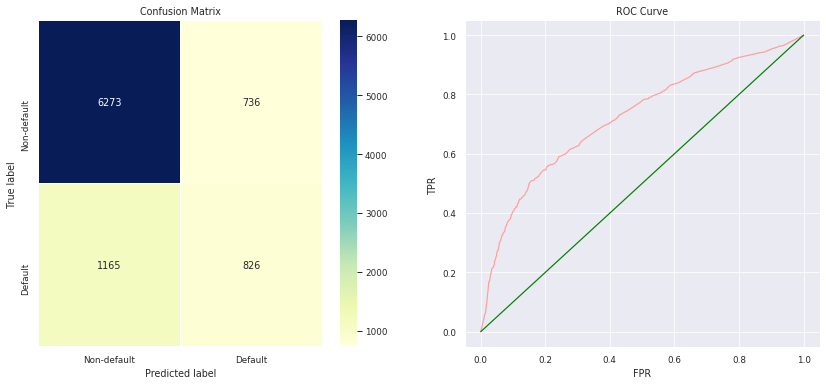

____________________________________________________________


In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(DecisionTreeClassifier(**param_dt[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

#### The best score for Decision Tree is registered when trained with the under sampling data with an Test AUC score of 0.747 and train K-Fold score of 0.70

### v) Random Forest

#### Let's first find out the best parameters for all the datasets:

In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_rf
    best_rf =[]
    print('Data is ',k)
    # Instantiate a Random forest classifier: tree
    rfc = RandomForestClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_estimators' : sp_randint(50,200),
              'max_features' : sp_randint(1,24),'max_depth': sp_randint(2,10),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,20),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object
    rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 200,random_state = 42,n_jobs = -1,return_train_score = True)

    # Fit it to the data
    rsearch_rfc.fit(i,j)
    best_rf.append(rsearch_rfc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(rsearch_rfc.best_params_), "for",k)
    print("_" * 100)

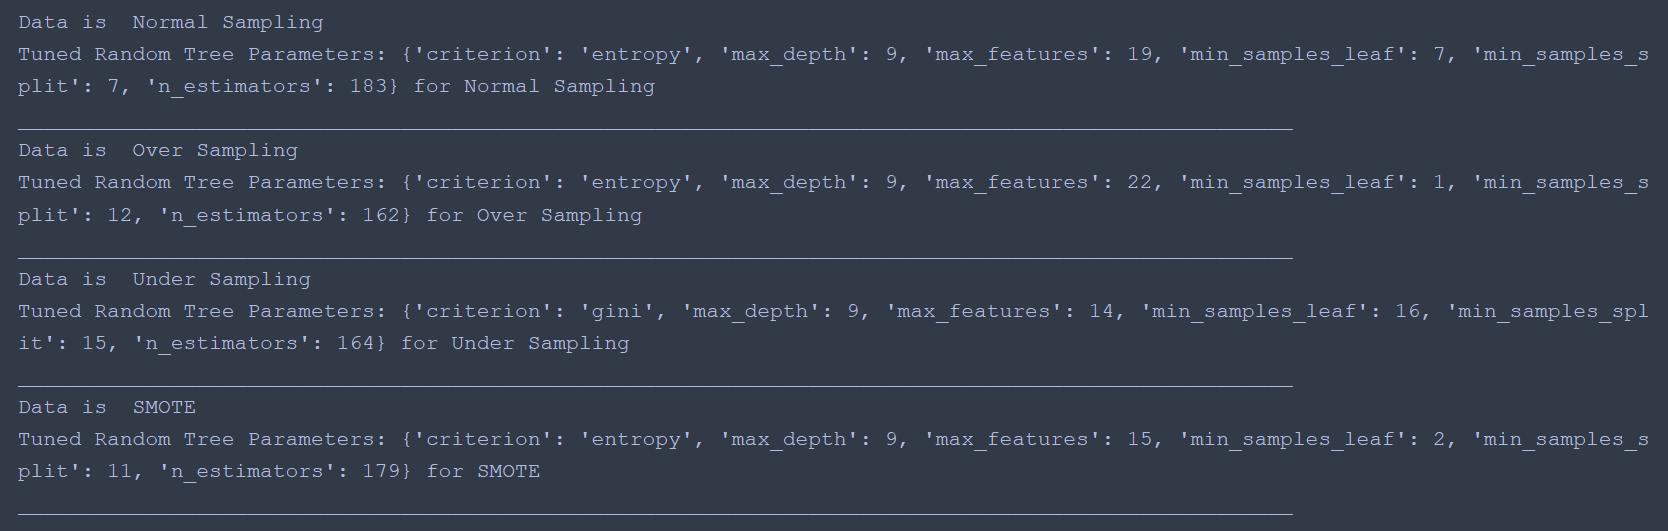

In [ ]:
Image(filename=data_dir/'cc4.PNG')

In [ ]:
param_rf = [{'criterion': 'entropy', 'max_depth': 9, 'max_features': 19, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 183},
           {'criterion': 'entropy', 'max_depth': 9, 'max_features': 22, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 162},
           {'criterion': 'gini', 'max_depth': 9, 'max_features': 14, 'min_samples_leaf': 16, 'min_samples_split': 15, 'n_estimators': 164},
           {'criterion': 'entropy', 'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 179}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.842
Train AUC Score 0.8452947667123322
Overall Test Accuracy 0.8171111111111111
Test AUC Score 0.7765993124001651
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

K-Fold scores: 0.658 (+/- 0.00003)


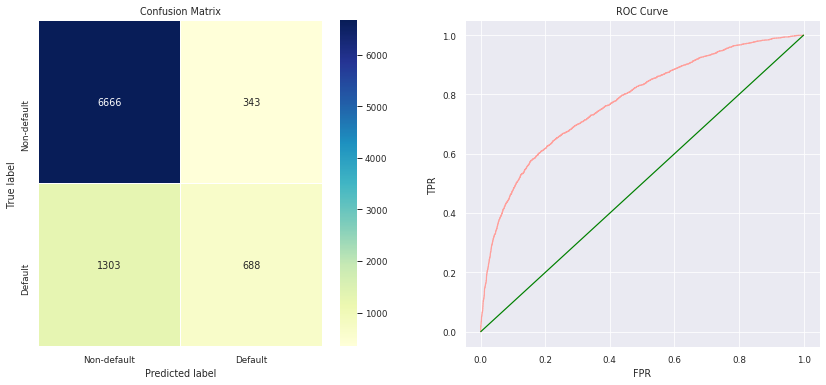

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.7723937633751147
Train AUC Score 0.8683389571473875
Overall Test Accuracy 0.787
Test AUC Score 0.7712617679830317
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      7009
           1       0.52      0.55      0.53      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.70      0.70      9000
weighted avg       0.79      0.79      0.79      9000

K-Fold scores: 0.751 (+/- 0.00001)


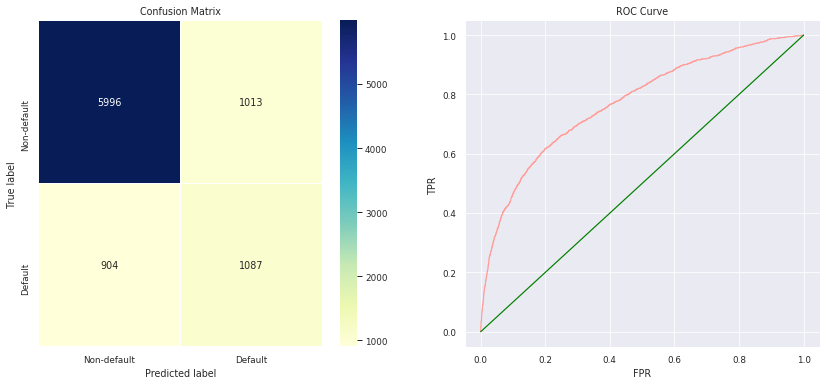

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.7564047362755651
Train AUC Score 0.8467957605722092
Overall Test Accuracy 0.7644444444444445
Test AUC Score 0.7760706457701403
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      7009
           1       0.47      0.61      0.53      1991

    accuracy                           0.76      9000
   macro avg       0.68      0.71      0.69      9000
weighted avg       0.79      0.76      0.77      9000

K-Fold scores: 0.712 (+/- 0.00011)


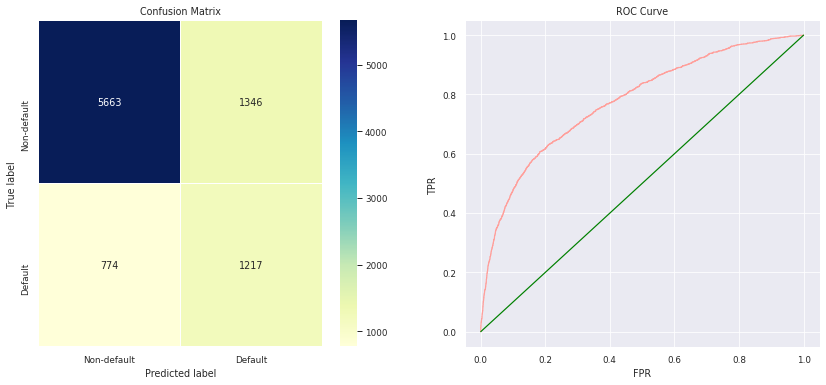

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.8618771018037298
Train AUC Score 0.9376192214153992
Overall Test Accuracy 0.8106666666666666
Test AUC Score 0.7701243912630378
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      7009
           1       0.60      0.43      0.50      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.68      0.69      9000
weighted avg       0.80      0.81      0.80      9000

K-Fold scores: 0.850 (+/- 0.00001)


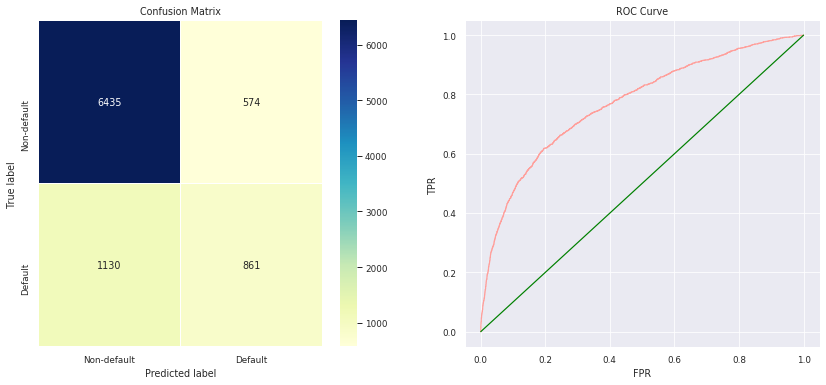

____________________________________________________________


In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(RandomForestClassifier(**param_rf[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

#### The best score for Random forest is registered when trained with the SMOTE data with an Test AUC score of 0.77 and train K-Fold score of 0.85

### vi) AdaBoost Classifier

#### Let's first find out the best parameters for all the datasets:

In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_ada
    best_ada =[]
    print('Data is ',k)
    # Instantiate a Ada Boost classifier
    ada = AdaBoostClassifier()

    #Creating a grid of hyperparameters
    param_grid = {'n_estimators': [200,300],
                  'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate' : [0.5, 0.75, 1.0]}

    #Building a 5 fold CV GridSearchCV object
    grid_ada = GridSearchCV(ada, param_grid, scoring = 'accuracy', cv=5,n_jobs = -1)

    #Fitting the grid to the training data
    grid_ada.fit(i,j)
    best_ada.append(grid_ada.best_params_)
    print("Tuned Ada Boost Parameters: {}".format(grid_ada.best_params_), "for",k)
    print("_" * 100)

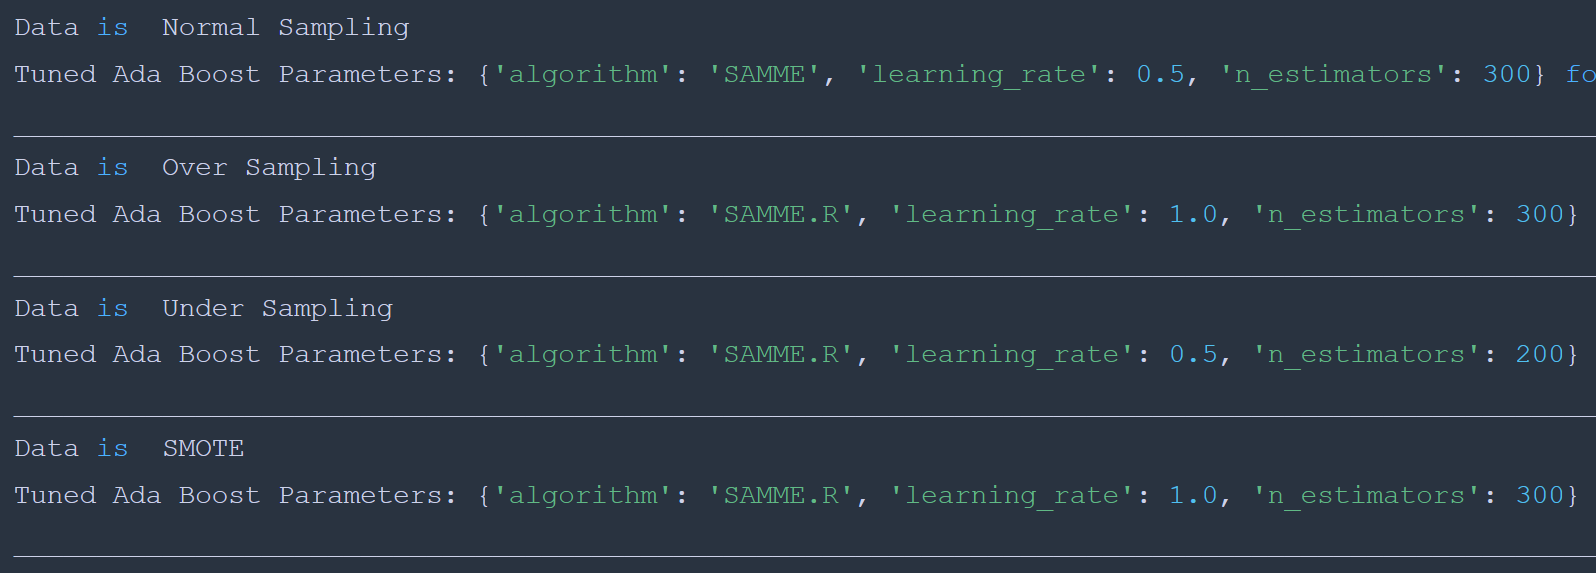

In [ ]:
Image(filename=data_dir/'cc5.PNG')

In [ ]:
param_ada = [{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300},
            {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300},
            {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200},
            {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.8211428571428572
Train AUC Score 0.7800456962858852
Overall Test Accuracy 0.8164444444444444
Test AUC Score 0.7677436178597669
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

K-Fold scores: 0.655 (+/- 0.00002)


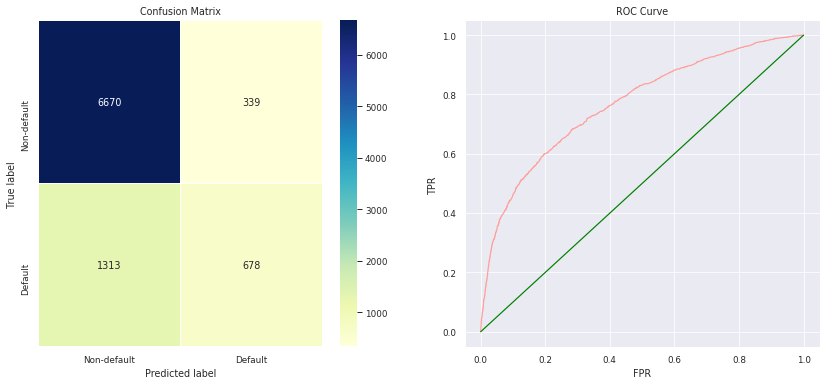

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.7278508101498012
Train AUC Score 0.8068288633022979
Overall Test Accuracy 0.7577777777777778
Test AUC Score 0.7648981337691748
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      7009
           1       0.46      0.59      0.52      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.78      0.76      0.77      9000

K-Fold scores: 0.718 (+/- 0.00001)


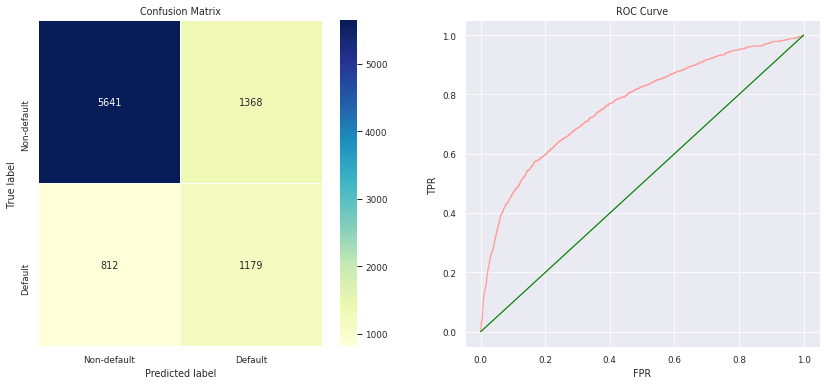

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.7222820236813778
Train AUC Score 0.7991749870516001
Overall Test Accuracy 0.7591111111111111
Test AUC Score 0.7692095883895851
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      7009
           1       0.47      0.61      0.53      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.79      0.76      0.77      9000

K-Fold scores: 0.708 (+/- 0.00010)


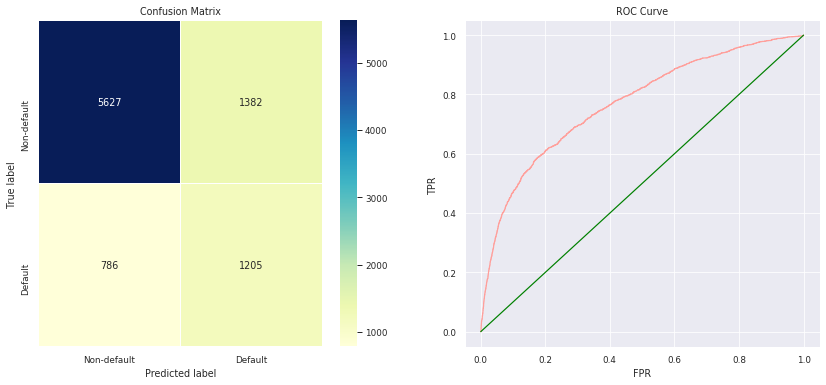

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.8620911036380312
Train AUC Score 0.9247609739611631
Overall Test Accuracy 0.8136666666666666
Test AUC Score 0.7644839429021408
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      7009
           1       0.63      0.39      0.48      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.81      0.80      9000

K-Fold scores: 0.860 (+/- 0.00002)


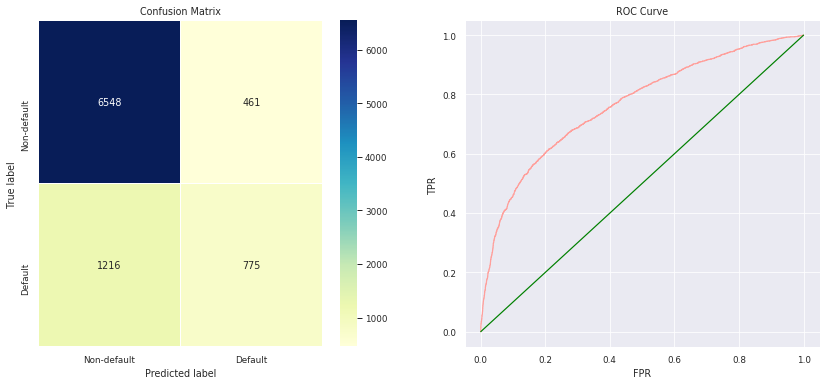

____________________________________________________________


In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(AdaBoostClassifier(**param_ada[l]), i,j,X_test,y_test)
    print("_" * 60)

#### The best score for Adaboost Classifier is registered when trained with the SMOTE data with an Test AUC score of 0.764 and train K-Fold score of 0.86

### vii) GradientBoosting Classifier

#### Let's first find out the best parameters for all the datasets:

In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_gbc
    best_gbc =[]
    print('Data is ',k)
    # Instantiate a Gradient Boost classifier
    gbc = GradientBoostingClassifier()

    #Creating a grid of hyperparameters
    param_grid = {'n_estimators': [200,300],
                  'learning_rate' : [0.5, 0.75, 1.0]}

    #Building a 5 fold CV GridSearchCV object
    grid_gbc = GridSearchCV(gbc, param_grid, scoring = 'accuracy', cv=5,n_jobs = -1)

    #Fitting the grid to the training data
    grid_gbc.fit(i,j)
    best_gbc.append(grid_gbc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(grid_gbc.best_params_), "for",k)
    print("_" * 100)

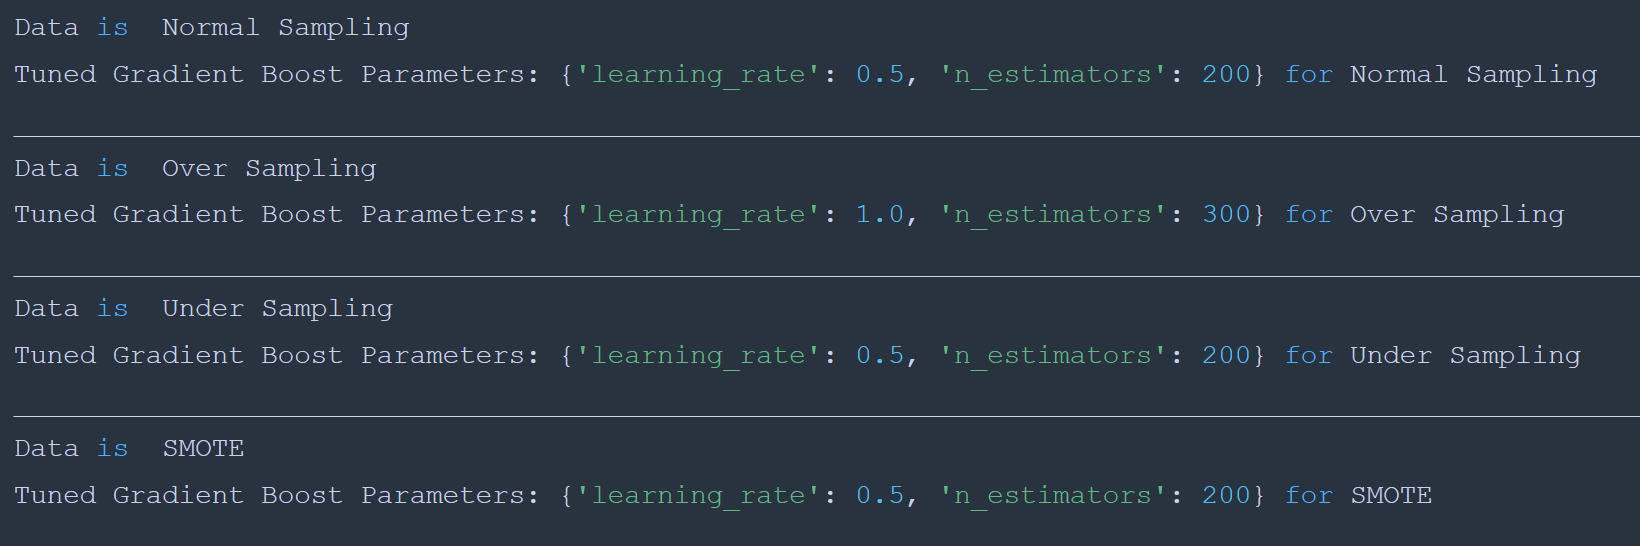

In [ ]:
Image(filename=data_dir/'cc6.PNG')

In [ ]:
param_gbc = [{'learning_rate': 0.5, 'n_estimators': 200},
            {'learning_rate': 1.0, 'n_estimators': 300},
            {'learning_rate': 0.5, 'n_estimators': 200},
            {'learning_rate': 0.5, 'n_estimators': 200}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.8684761904761905
Train AUC Score 0.8970215538645874
Overall Test Accuracy 0.8044444444444444
Test AUC Score 0.759694628109271
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7009
           1       0.59      0.37      0.46      1991

    accuracy                           0.80      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.78      0.80      0.79      9000

K-Fold scores: 0.654 (+/- 0.00003)


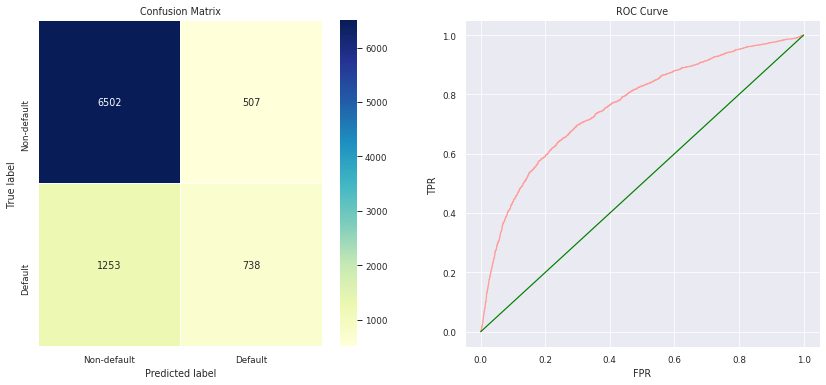

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.9003057169061449
Train AUC Score 0.9618269384353818
Overall Test Accuracy 0.7386666666666667
Test AUC Score 0.7185714227363126
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      7009
           1       0.43      0.53      0.47      1991

    accuracy                           0.74      9000
   macro avg       0.64      0.67      0.65      9000
weighted avg       0.76      0.74      0.75      9000

K-Fold scores: 0.830 (+/- 0.00005)


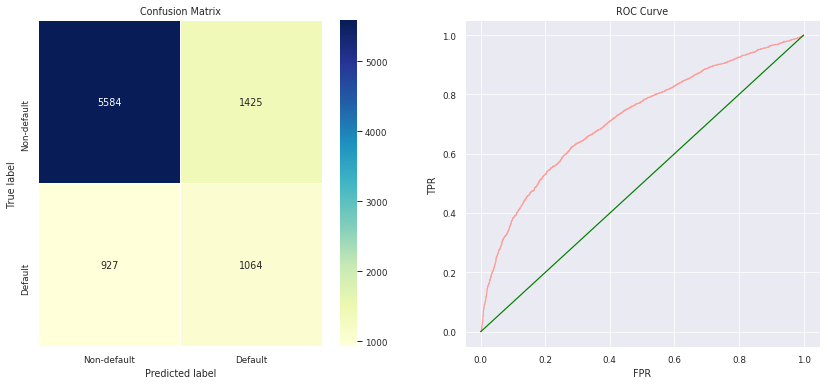

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.8558665231431647
Train AUC Score 0.9372954471456165
Overall Test Accuracy 0.6964444444444444
Test AUC Score 0.7430954274976443
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.71      0.79      7009
           1       0.39      0.64      0.48      1991

    accuracy                           0.70      9000
   macro avg       0.63      0.68      0.63      9000
weighted avg       0.77      0.70      0.72      9000

K-Fold scores: 0.685 (+/- 0.00018)


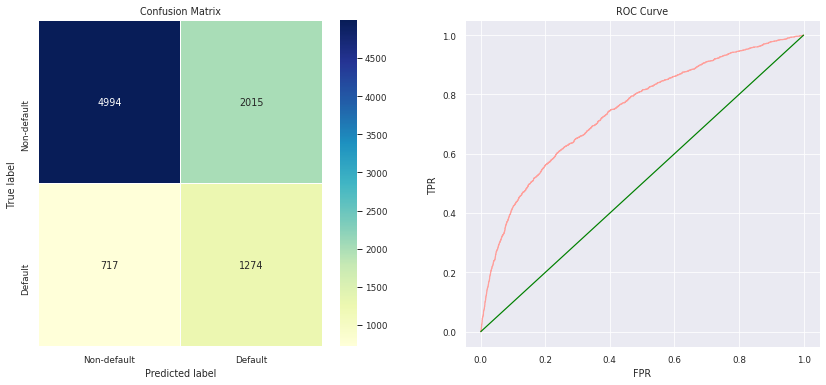

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.8953225313359828
Train AUC Score 0.9604183994285309
Overall Test Accuracy 0.8033333333333333
Test AUC Score 0.7472757097336071
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      7009
           1       0.58      0.40      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.66      0.68      9000
weighted avg       0.79      0.80      0.79      9000

K-Fold scores: 0.858 (+/- 0.00001)


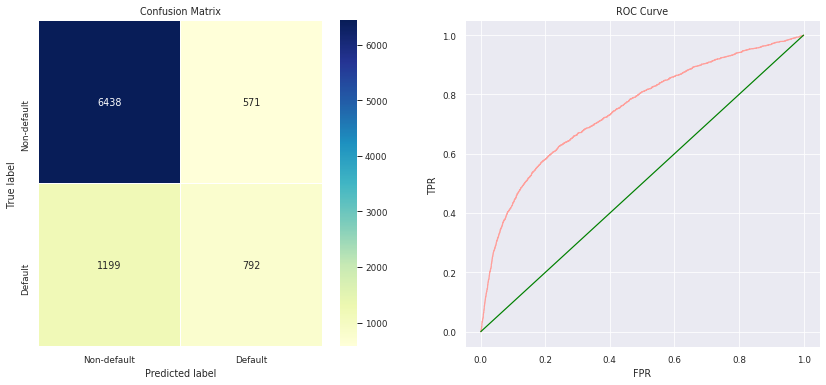

____________________________________________________________


In [ ]:
for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(GradientBoostingClassifier(**param_gbc[l]), i,j,X_test,y_test)
    print("_" * 60)

#### The best score for Gradient Boost Classifier is registered when trained with the SMOTE data with an Test AUC score of 0.747 and train K-Fold score of 0.85 after it was standardized

### viii) XGBoost Classifier

#### Let's first find out the best parameters for all the datasets:

In [ ]:
xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_xgb
    best_xgb =[]
    print('Data is ',k)  # Instantiate a XGBoost classifier
    xgb= XGBClassifier()

    param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
                  "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
                 "min_child_weight" : [1, 3, 5, 7],
                 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
                 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7] }

    #Building a 5 fold CV GridSearchCV object
    xgb_RS = RandomizedSearchCV(xgb, param_grid ,cv = 5, scoring = 'roc_auc',n_iter = 200,n_jobs = -1)

    #Fitting the grid to the training data
    xgb_RS.fit(i,j)
    best_xgb.append(xgb_RS.best_params_)
    print("Tuned XG Boost Parameters: {}".format(xgb_RS.best_params_), "for",k)
    print("_" * 100)

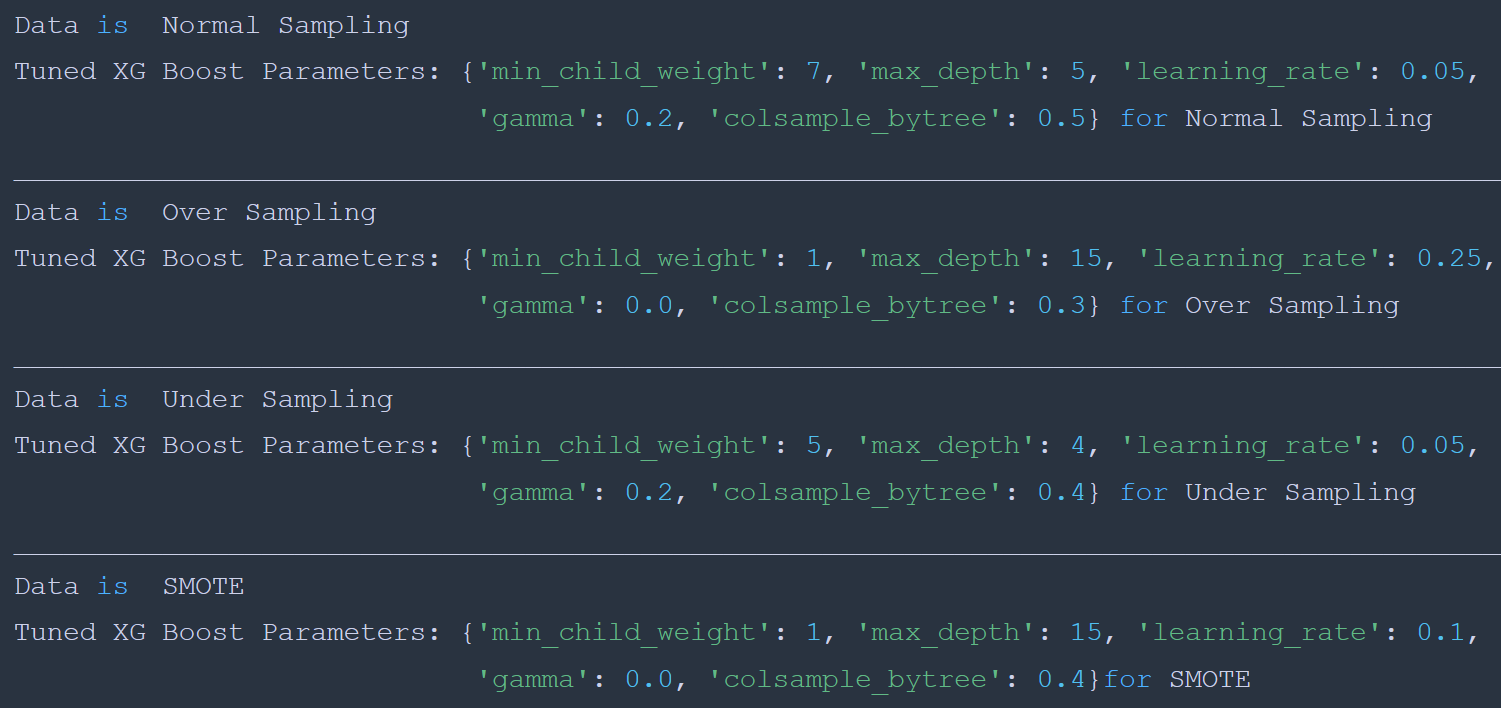

In [ ]:
Image(filename=data_dir/'cc7.PNG')

In [ ]:
param_xgb = [{'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05,
                            'gamma': 0.2, 'colsample_bytree': 0.5},
            {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25,
                            'gamma': 0.0, 'colsample_bytree': 0.3},
            {'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05,
                            'gamma': 0.2, 'colsample_bytree': 0.4},
            {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1,
                            'gamma': 0.0, 'colsample_bytree': 0.4}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 32}
Overall Train Accuracy 0.8318095238095238
Train AUC Score 0.8167430915054468
Overall Test Accuracy 0.8183333333333334
Test AUC Score 0.7808003041794797
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

K-Fold scores: 0.661 (+/- 0.00003)


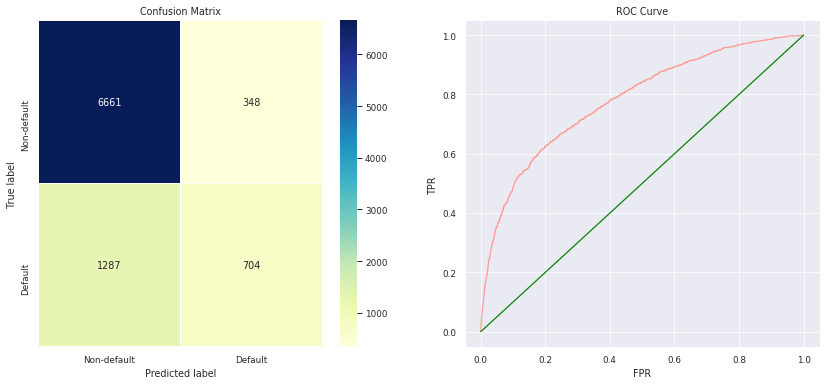

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 15}
Overall Train Accuracy 0.996453683888719
Train AUC Score 0.9999456139811417
Overall Test Accuracy 0.7963333333333333
Test AUC Score 0.7476071699162138
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      7009
           1       0.55      0.41      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.66      0.67      9000
weighted avg       0.78      0.80      0.79      9000

K-Fold scores: 0.931 (+/- 0.00001)


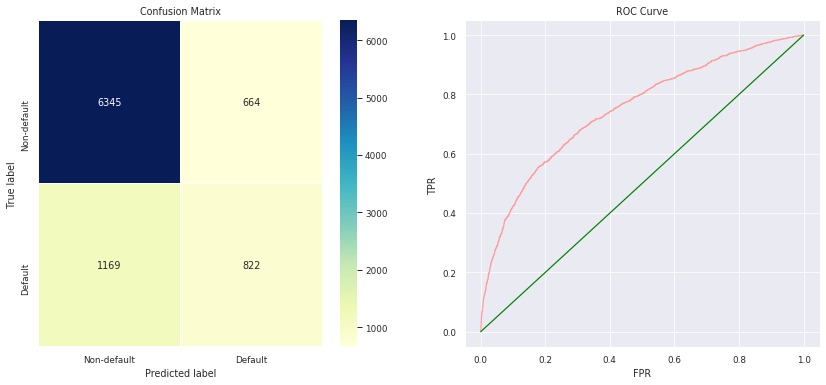

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 28}
Overall Train Accuracy 0.7332615715823466
Train AUC Score 0.8124578090728019
Overall Test Accuracy 0.7636666666666667
Test AUC Score 0.7795202179245899
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      7009
           1       0.47      0.62      0.54      1991

    accuracy                           0.76      9000
   macro avg       0.68      0.71      0.69      9000
weighted avg       0.79      0.76      0.77      9000

K-Fold scores: 0.715 (+/- 0.00006)


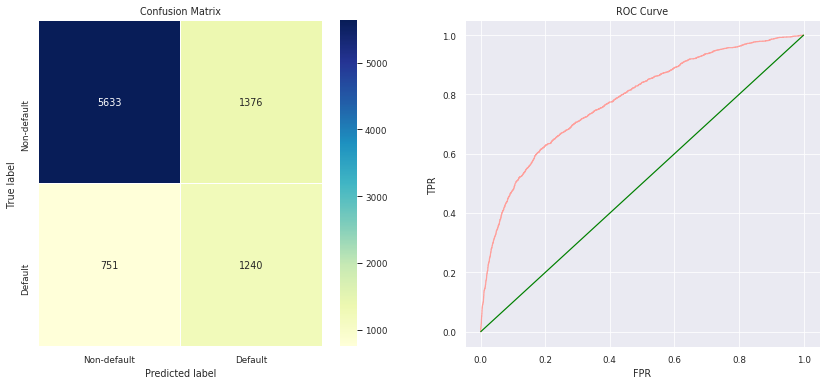

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
Overall Train Accuracy 0.9972179761540814
Train AUC Score 0.9999721088232552
Overall Test Accuracy 0.8018888888888889
Test AUC Score 0.7553226930231555
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      7009
           1       0.57      0.40      0.47      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.66      0.68      9000
weighted avg       0.78      0.80      0.79      9000

K-Fold scores: 0.879 (+/- 0.00002)


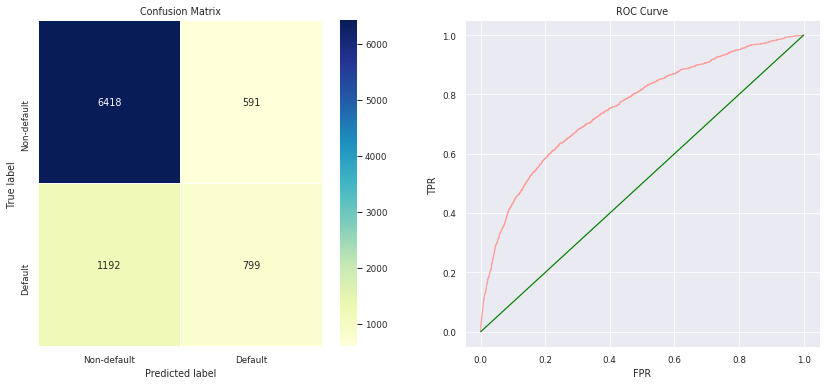

____________________________________________________________


In [ ]:
for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(XGBClassifier(**param_xgb[l]), i,j,X_test,y_test)
    print("_" * 60)

#### The best score for XG Boost Classifier is registered when trained with the under sampling data with an Test AUC score of 0.78 and train K-Fold score of 0.716 after it was standardized

# 6) Conclusion:

### The models are performing well for SMOTE data and also undersampled data rather than imbalanced data. Thus before modeling resampling techniques should be used to make sure that the models are not biased.

### Let's see the top 5 most scoring models

In [ ]:
dic = {'Model':['XGboost','Random forest','Ada Boost','Gradient Boost','Decision Tree'],
       'Data':['SMOTE','SMOTE','SMOTE','SMOTE','Under Sampling'],
       'Accuracy':[0.76,0.81,0.81,0.80,0.78],
       'K-Fold score':[0.71,0.85,0.86,0.85,0.70],
       'AUC-ROC Score':[0.78,0.77,0.76,0.74,0.74]}
score_df = pd.DataFrame(dic)
fig =  ff.create_table(score_df)
fig.show()

### Let's see the feature importance of our best model by defining a function

In [ ]:
def plot_Feature(feature, clf):
    tmp = pd.DataFrame({'Feature': feature, 
                        'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    fig = go.Figure(go.Bar(
    x=tmp['Feature'],y=tmp['Feature importance'],marker={'color': tmp['Feature importance'], 
    'colorscale': 'Viridis'}
    ))
    fig.update_layout(title_text='Feature Importance',xaxis_title="Feature",yaxis_title="Importance")
    return fig.show()

In [ ]:
#BEST MODEL with BEST PARAMETERS
param_r = {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 19, 'min_samples_split': 18}
rfc_s = RandomForestClassifier(**param_r,random_state = 42).fit(X_SMOTE,y_SMOTE)

In [ ]:
plot_Feature(X_SMOTE.columns,rfc_s)

### It looks like the repayment status and repayment amount are more important features!